# Homework Directions for Supervised Machine Learning: CART


# Supervised Machine Learning

Supervised machine learning, including techniques like CART (Classification and Regression Trees), is a critical component of the broader field of machine learning, especially in the context of big data

Supervised learning is a type of machine learning where the model is trained on a labeled dataset. This dataset contains input-output pairs, where the outputs are known and used to train the model.

# Discovery and Learning

Data-Driven Insights: In the context of big data, supervised learning, including algorithms like CART, enables data-driven decision-making by discovering patterns and relationships in the data.

Predictive Analytics: They are integral to predictive analytics, allowing businesses and researchers to make informed predictions about future trends and behaviors.

# CART Regression with Scikit-Learn: Overview

A decision tree builds regression or classification models in the form of a tree structure.

Regression trees are needed when the response variable is numeric or continuous.

In either case, the predictors or independent variables may be categorical or numeric. It is the target variable that determines the type of decision tree needed.

# K-Fold Cross-Validation

In K Fold cross-validation, the data is divided into k subsets.

One of the k subsets is used as the test set/ validation set and the other k-l subsets are put together to form a training set.

The error estimation is averaged over all k trials to get the total effectiveness of our model.

In the following illustration K-Fold = 4

# Negative Mean Squared Error (Negative MSE)

In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator ( a procedure for estimating an unobserved quantity) measures the average of the squares of the errors or deviation, i.e., the difference between the estimator and what is estimated.

MSE is a risk function, corresponding to the expected value of the squared error loss or quadratic loss.

The difference occurs because of randomness or because the estimator doesn't account for information that could produce a more accurate estimate.

The MSE is a measure of the quality of an estimator.

In the general case, it is non-negative, and values closer to zero are better.




In [4]:
# Import Python Libraries: NumPy and Pandas

import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import scit-Learn module for the algorithm/model: DecisionTreeRegressor

from sklearn. tree import DecisionTreeRegressor

# Import scikit-Learn module to split the dataset into train/ test sub-datasets

from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
# Load the data set into a pandas dataframe
# Read the Iris data set and create the dataframe df

df = pd.read_csv ("BostonHousing.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# Preprocess the Dataset:

In [6]:
# Clean data with find the missing values. 
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [7]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.

df2= df[['CRIM','INDUS', 'TAX','MEDV']]

# We will use df2 for the rest of the calculations.

In [8]:
df2

,CRIM,INDUS,TAX,MEDV
0,0.00632,2.31,296,24.0
1,0.02731,7.07,242,21.6
2,0.02729,7.07,242,34.7
3,0.03237,2.18,222,33.4
4,0.06905,2.18,222,36.2
...,...,...,...,...
501,0.06263,11.93,273,22.4
502,0.04527,11.93,273,20.6
503,0.06076,11.93,273,23.9
504,0.10959,11.93,273,22.0


In [9]:
#  Get the number of records/rows, and the number of variables/columns  
df2.shape 

(506, 4)

In [53]:
# # Get the data types of all variables
df2.dtypes

CRIM     float64
INDUS    float64
TAX        int64
MEDV     float64
dtype: object

In [10]:
# # Obtain the summary statistics of the data
df2.describe()

,CRIM,INDUS,TAX,MEDV
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,408.237154,22.532806
std,8.601545,6.860353,168.537116,9.197104
min,0.006320,0.460000,187.000000,5.000000
25%,0.082045,5.190000,279.000000,17.025000
50%,0.256510,9.690000,330.000000,21.200000
75%,3.677083,18.100000,666.000000,25.000000
max,88.976200,27.740000,711.000000,50.000000


# Create a Histogram

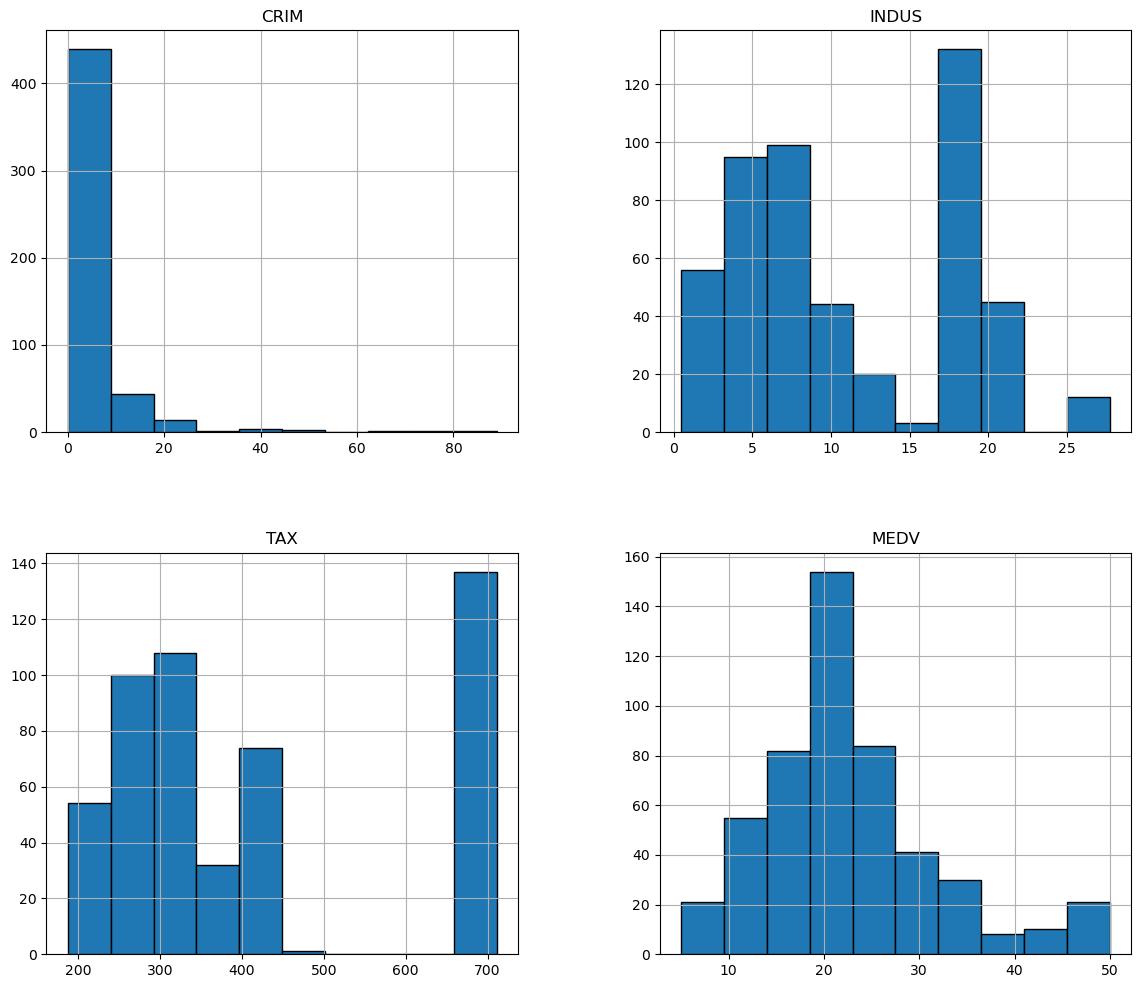

In [11]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.

df2.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

# Scatter Matrix Plot

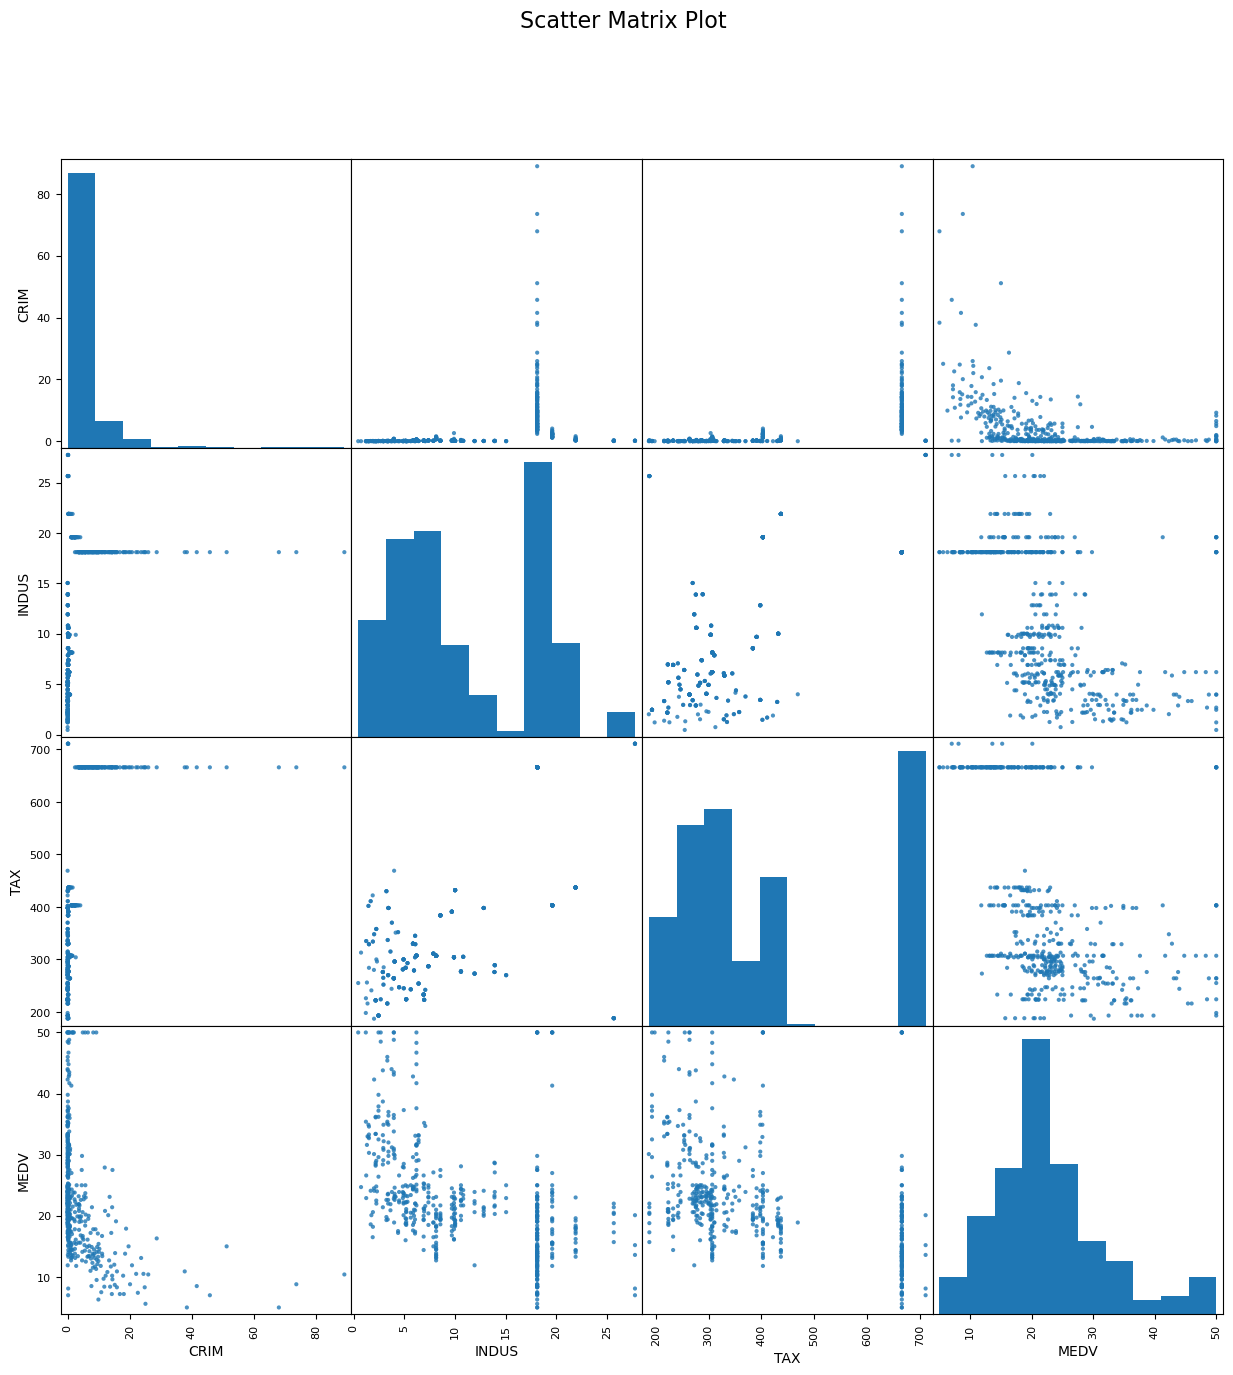

In [13]:
# Generating the scatter matrix plot
scatter_matrix(df2, alpha=0.8, figsize=(15, 15)) #  , diagonal='kde')

# Setting the title of the plot
plt.suptitle("Scatter Matrix Plot", fontsize=16)

# Display the plot
plt.show()

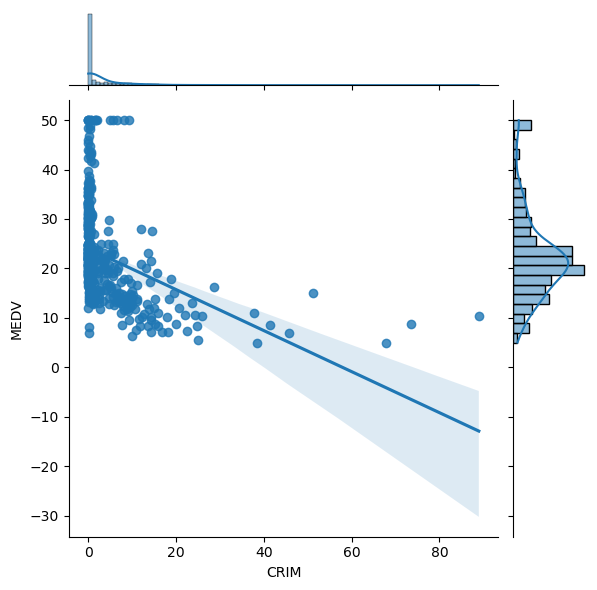

In [57]:
sns.jointplot(data=df2, x="CRIM", y="MEDV", kind="reg")

# Join Plots with Seaborn

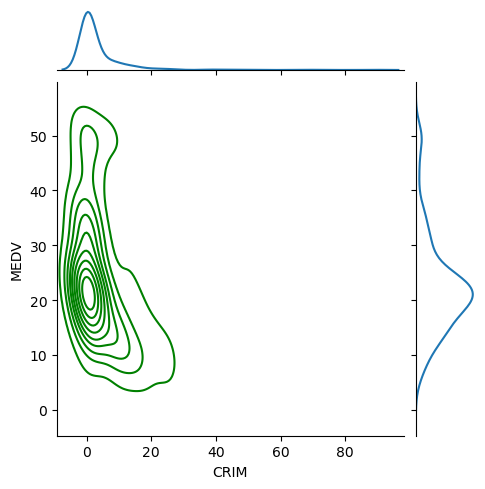

In [58]:
# Join plot with CRIM and MEDV

sns.jointplot(x = 'CRIM', y = 'MEDV', data = df2, kind = 'kde', height = 5, joint_kws={'color':'green'})
plt.show()

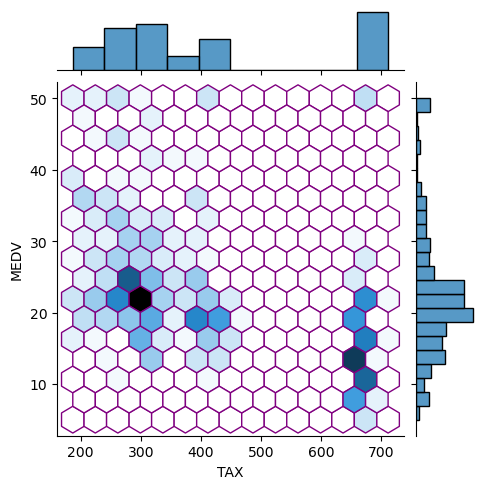

In [59]:
# Join plot with TAX and MEDV

sns.jointplot(x = 'TAX', y = 'MEDV', data = df2, kind = 'hex', height = 5, joint_kws={'color':'purple'})
plt.show()

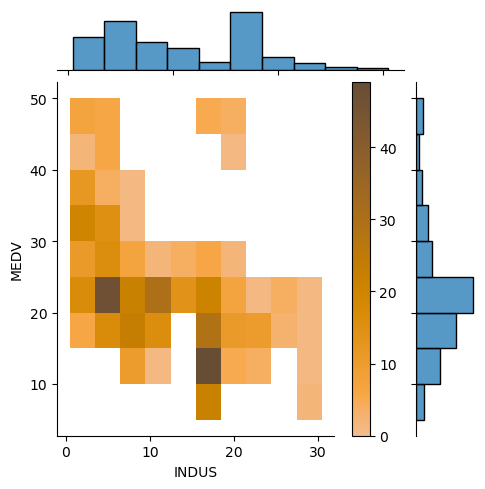

In [60]:
# Join plot with TAX and MEDV 

sns.jointplot(x = 'INDUS', y = 'MEDV', data = df2, kind = 'hist', height = 5, joint_kws={'color':'orange'}, binwidth=(3,5), cbar=True)
plt.show()

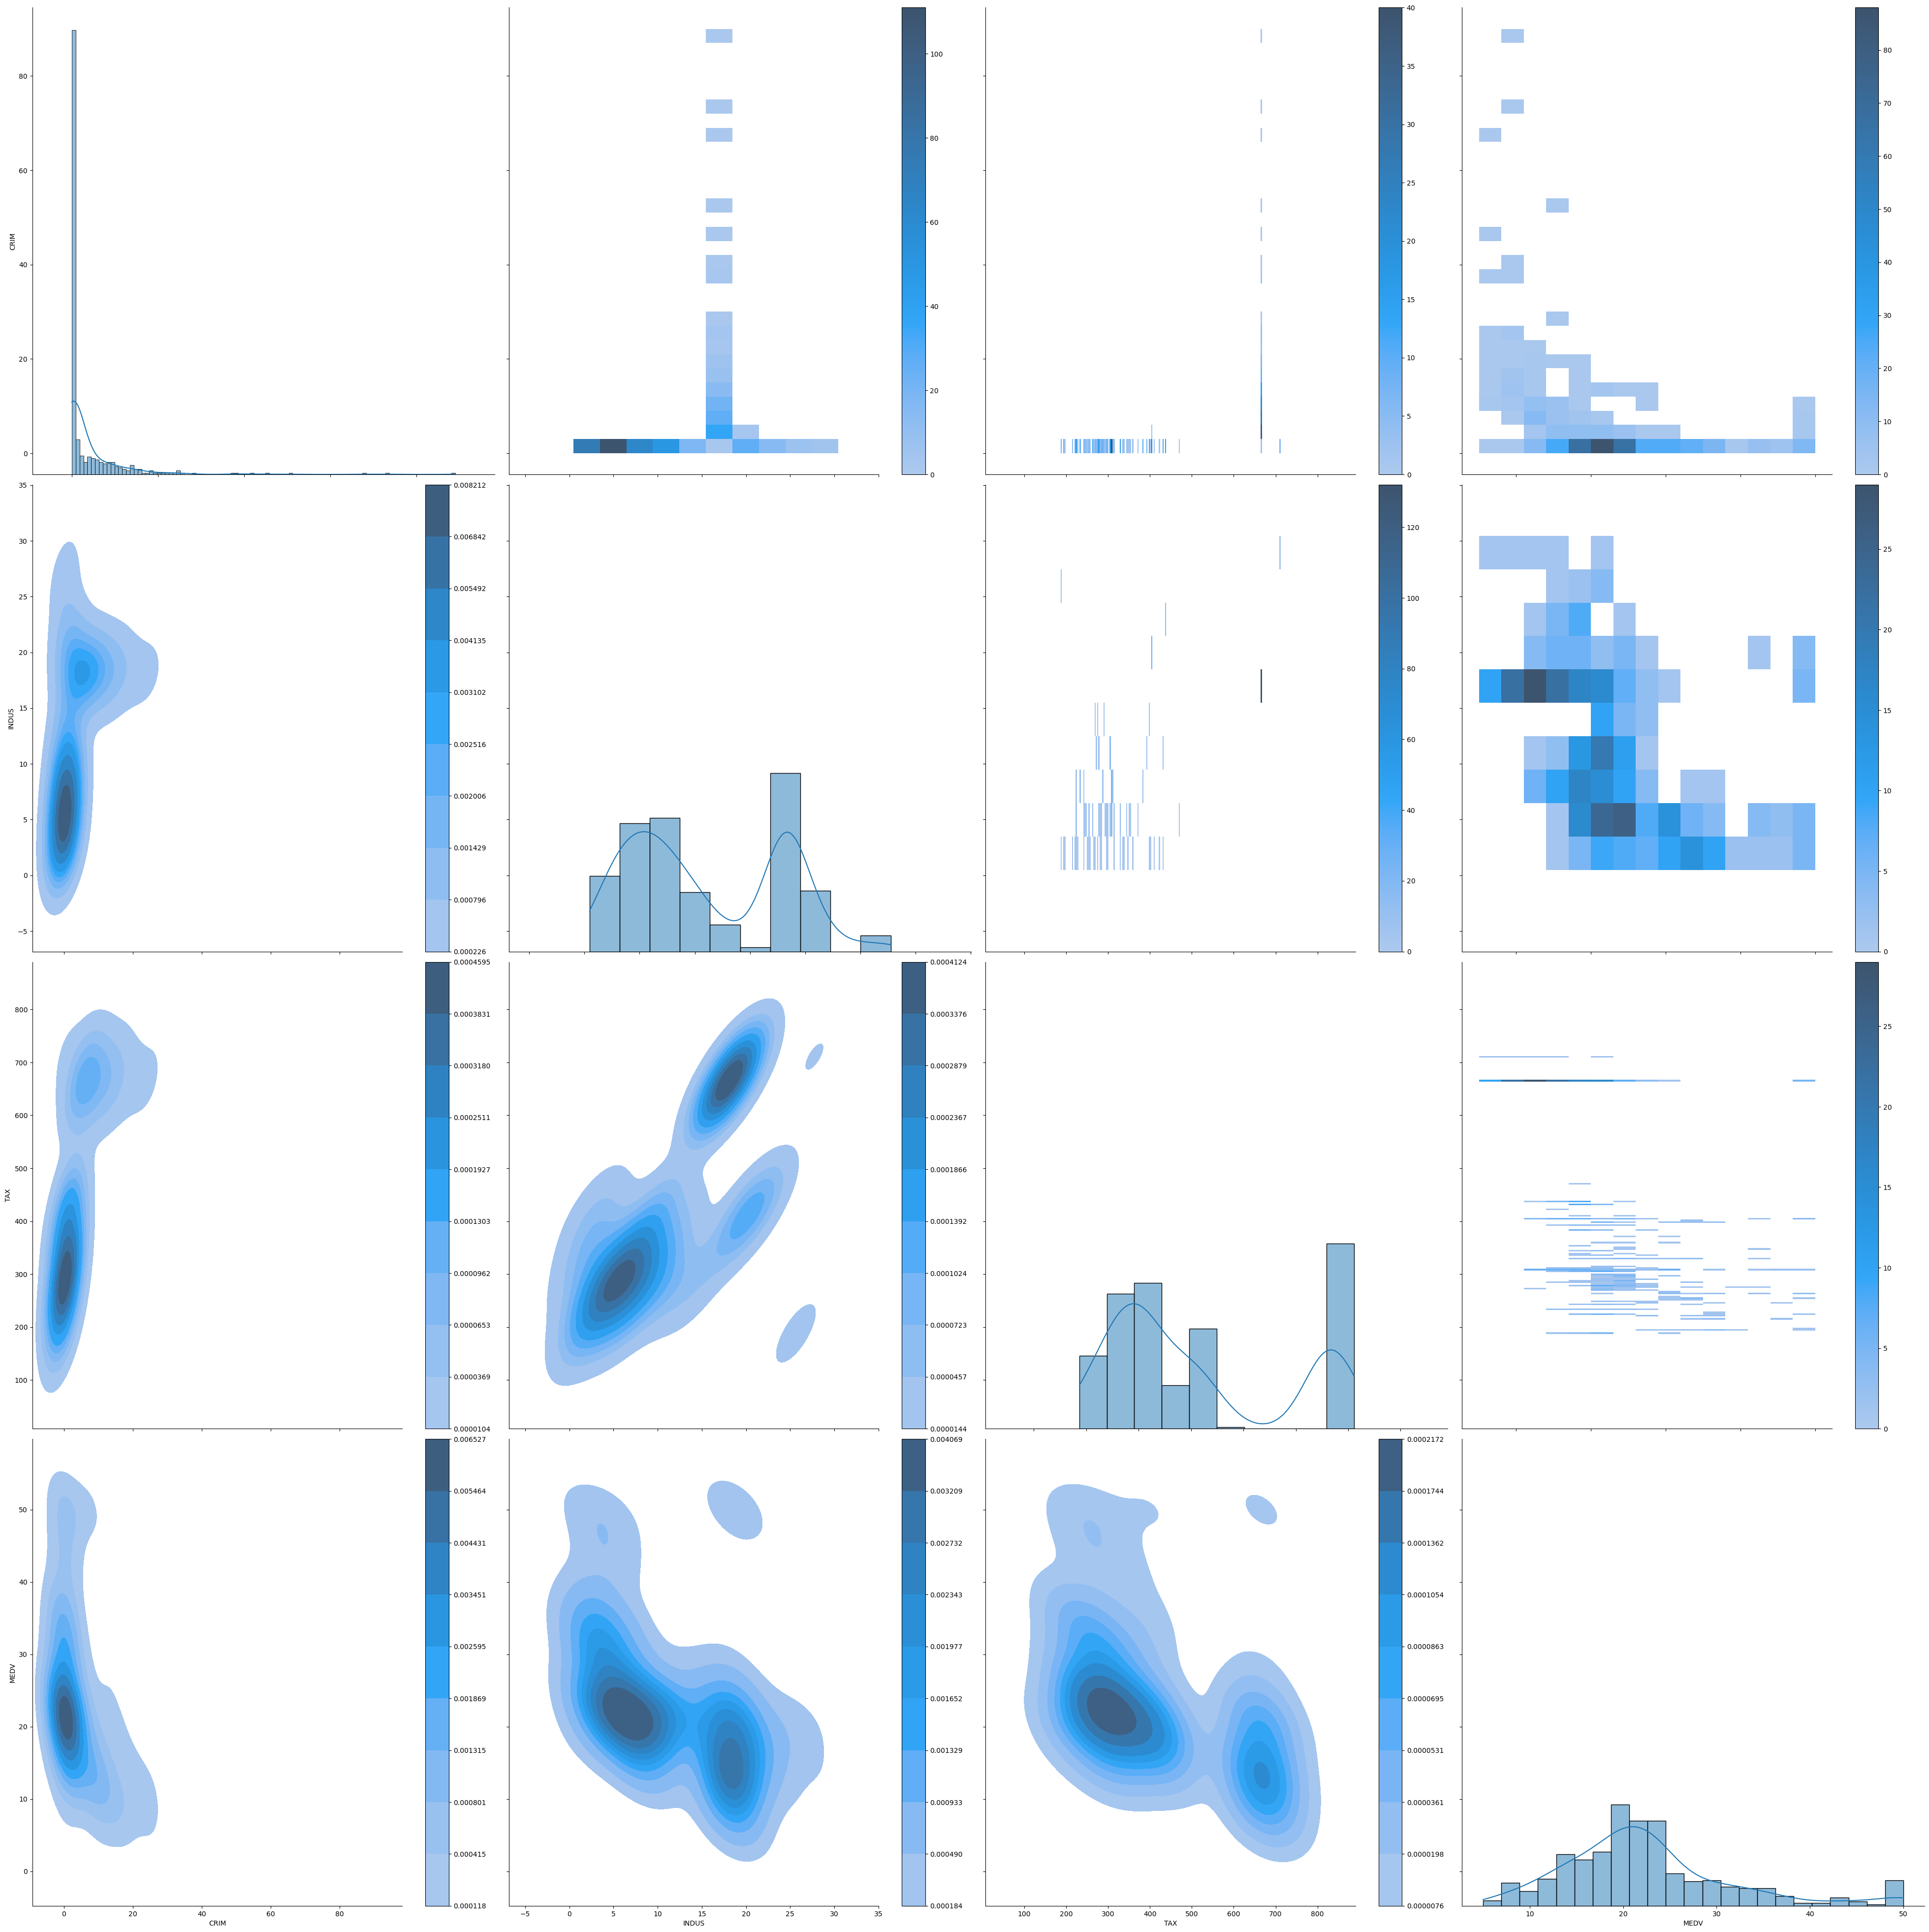

In [61]:
# Now we will combine the join plots

g = sns.PairGrid(df2, height= 10)
g.map_upper(sns.histplot, bins= 20, binwidth=3, cbar=True)
g.map_lower(sns.kdeplot, fill=True, cbar=True)
g.map_diag(sns.histplot, kde=True, cbar=True)

# Separate Dataset into Input & Output Arrays

In [62]:
# Store the dataframe values into a numPy array

array = df2.values

# Separate the array into input and output components by slicing (you used this in your Python fundamental homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)

Y = array [:,3]

# Split into Input/Output Array into Training/Testing Datasets

In [63]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

# Build and Train the Model

In [64]:
# Build the model

model = DecisionTreeRegressor(random_state=seed)

# Train the model using the training sub-dataset

model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept

DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=seed, splitter='best')

DecisionTreeRegressor(criterion='mse', min_samples_leaf=2, random_state=7)

# Calculate R-Squared

In [65]:
R_squared = model.score(X_test, Y_test)
print('R-Squared = ', R_squared)

R-Squared =  0.08775996069885494


# Notes: 
The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable. This is very low. Think about how you could increase the R-squared. What variables would you use? This will be important for the final.
Model Prediction

In [66]:
model.predict([[12,10,450]])

array([20.8])

In [67]:
model.predict([[2,30,50]])

array([14.4])

# We have now trained the model. Let’s use the trained model to predict the “Median value of owner-occupied homes in 1000 dollars” (MEDV).

We are using the following predictors for the 1st prediction:

CRIM: per capita crime rate by town: 12

INDUS: proportion of non-retail business acres per town: 10

TAX: full-value property-tax rate per $10,000: 450


# Notes:  So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $12,600.

We are using the following predictors for the 2nd prediction:

CRIM: per capita crime rate by town: 2

INDUS: proportion of non-retail business acres per town: 30

TAX: full-value property-tax rate per $10,000: 50

# Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $15,700.

# Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [68]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -75.28121960784313


# Notes:
After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us.  This value would traditionally be a positive value but scikit reports this value as a negative value. If you want a positive number, you may calculate the square root of the Negative Mean Squared Error value.

In [69]:
# Homework ADTA 5240 Module 6